In [56]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.integrate
from astropy.table import Table, join
import healpy
from clmm import Cosmology
import pyccl as ccl
import clmm
import glob

In [57]:
import pickle,sys

def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [58]:
f = load('/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim_database/data_vary_fuducial_cosmology/ind_profile_redmapper.pkl')

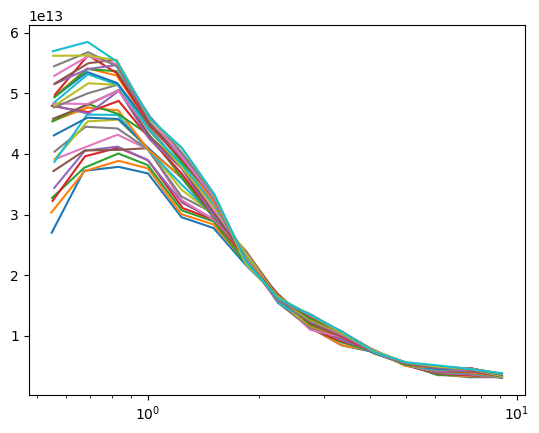

In [59]:
for i, Om_ in enumerate(np.linspace(0.1, 0.6, 30)):

    plt.plot(f[f'Om{i}_radius'][0], np.mean(f[f'Om{i}_DSt'], axis=0))
plt.xscale('log')
#plt.loglog()

In [16]:
radius = f[f'w0_radius'][0]

In [27]:
ds_raio1 = [np.mean(f[f'w{i}_DSt'], axis=0)[3]/np.mean(f[f'w{21}_DSt'], axis=0)[3]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio2 = [np.mean(f[f'w{i}_DSt'], axis=0)[7]/np.mean(f[f'w{21}_DSt'], axis=0)[7]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio3 = [np.mean(f[f'w{i}_DSt'], axis=0)[10]/np.mean(f[f'w{21}_DSt'], axis=0)[10]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
ds_raio4 = [np.mean(f[f'w{i}_DSt'], axis=0)[14]/np.mean(f[f'w{21}_DSt'], axis=0)[14]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]

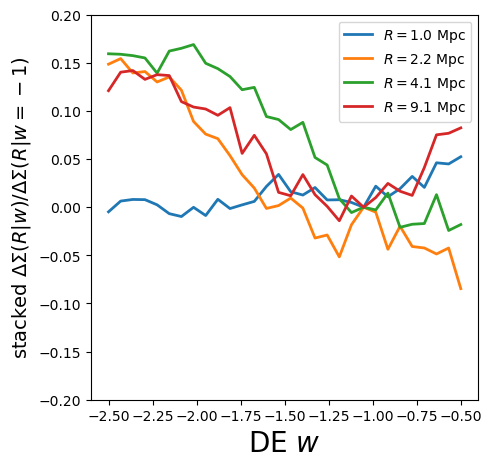

In [28]:
plt.figure(figsize=(5,5))
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio1, label = f'$R = {radius[3]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio2, label = f'$R = {radius[7]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio3, label = f'$R = {radius[10]:.1f}$ Mpc', lw=2)
plt.plot(np.linspace(-2.5, -0.5, 30), ds_raio4, label = f'$R = {radius[14]:.1f}$ Mpc', lw=2)
plt.ylabel('stacked $\Delta\Sigma(R|w)/\Delta\Sigma(R|w=-1)$', fontsize=14)
plt.xlabel(r'DE $w$', fontsize=20)
plt.ylim(-0.2, 0.2)
plt.legend()

In [19]:
np.linspace(-2.5, -0.5, 30)

array([-2.5       , -2.43103448, -2.36206897, -2.29310345, -2.22413793,
       -2.15517241, -2.0862069 , -2.01724138, -1.94827586, -1.87931034,
       -1.81034483, -1.74137931, -1.67241379, -1.60344828, -1.53448276,
       -1.46551724, -1.39655172, -1.32758621, -1.25862069, -1.18965517,
       -1.12068966, -1.05172414, -0.98275862, -0.9137931 , -0.84482759,
       -0.77586207, -0.70689655, -0.63793103, -0.56896552, -0.5       ])

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0.5): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='y' #blue
c2='b' #green
n=14

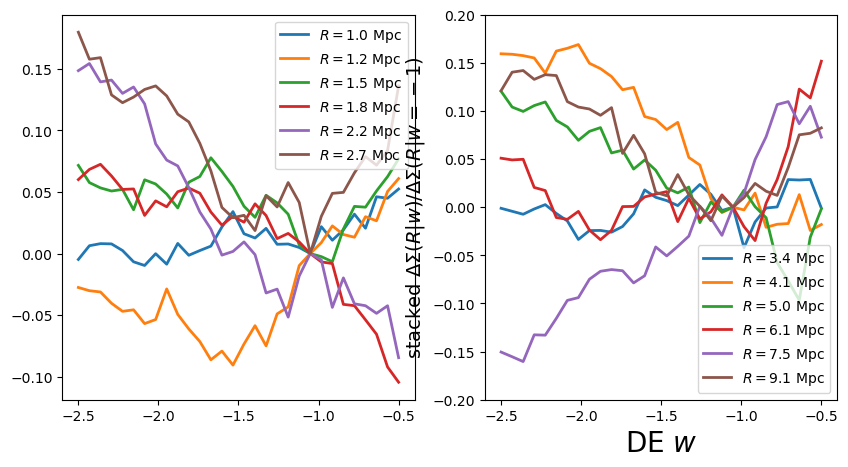

In [54]:
plt.figure(figsize=(10,5))
for k in range(15):
    if radius[k] < 1: continue
    if radius[k] < 3:
        plt.subplot(121)
    else:
        plt.subplot(122)
    ds_ratio = [np.mean(f[f'w{i}_DSt'], axis=0)[k]/np.mean(f[f'w{21}_DSt'], axis=0)[k]-1 for i, w_ in enumerate(np.linspace(-2.5, -0.5, 30))]
    plt.plot(np.linspace(-2.5, -0.5, 30), ds_ratio,
             label = f'$R = {radius[k]:.1f}$ Mpc',
            # color = colorFader(c1,c2,k/n),
    lw=2)
    plt.legend()
        
plt.ylabel('stacked $\Delta\Sigma(R|w)/\Delta\Sigma(R|w=-1)$', fontsize=14)
plt.xlabel(r'DE $w$', fontsize=20)
plt.ylim(-0.2, 0.2)
plt.legend()

In [55]:
f.colnames

['id',
 'ra',
 'dec',
 'z',
 'richness',
 'Om0_DSt',
 'Om0_DSx',
 'Om0_W_l',
 'Om0_radius',
 'Om1_DSt',
 'Om1_DSx',
 'Om1_W_l',
 'Om1_radius',
 'Om2_DSt',
 'Om2_DSx',
 'Om2_W_l',
 'Om2_radius',
 'Om3_DSt',
 'Om3_DSx',
 'Om3_W_l',
 'Om3_radius',
 'Om4_DSt',
 'Om4_DSx',
 'Om4_W_l',
 'Om4_radius',
 'Om5_DSt',
 'Om5_DSx',
 'Om5_W_l',
 'Om5_radius',
 'Om6_DSt',
 'Om6_DSx',
 'Om6_W_l',
 'Om6_radius',
 'Om7_DSt',
 'Om7_DSx',
 'Om7_W_l',
 'Om7_radius',
 'Om8_DSt',
 'Om8_DSx',
 'Om8_W_l',
 'Om8_radius',
 'Om9_DSt',
 'Om9_DSx',
 'Om9_W_l',
 'Om9_radius',
 'Om10_DSt',
 'Om10_DSx',
 'Om10_W_l',
 'Om10_radius',
 'Om11_DSt',
 'Om11_DSx',
 'Om11_W_l',
 'Om11_radius',
 'Om12_DSt',
 'Om12_DSx',
 'Om12_W_l',
 'Om12_radius',
 'Om13_DSt',
 'Om13_DSx',
 'Om13_W_l',
 'Om13_radius',
 'Om14_DSt',
 'Om14_DSx',
 'Om14_W_l',
 'Om14_radius',
 'Om15_DSt',
 'Om15_DSx',
 'Om15_W_l',
 'Om15_radius',
 'Om16_DSt',
 'Om16_DSx',
 'Om16_W_l',
 'Om16_radius',
 'Om17_DSt',
 'Om17_DSx',
 'Om17_W_l',
 'Om17_radius',
 'Om18_DS